In [196]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [197]:
def load_data():
    data = pd.read_csv("housing_price.csv", index_col=0)
    return data

data = load_data()
data = shuffle(data)
data = data[:50]
print(data.head())
cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
data = data.drop(cols, axis=1)
# print(data.head())
data = (data - data.mean())/data.std()
data.head()

price_mean, price_std = data.mean()[0], data.std()[0]
data = (data - data.mean())/data.std()

price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
406  86000.0     6900         3        2        1      yes     yes      yes   
200  52000.0     3570         3        1        2      yes      no      yes   
122  80000.0    10500         4        2        2      yes      no       no   
414  31900.0     5300         3        1        1       no      no       no   
215  62000.0     3500         4        1        2      yes      no       no   

    gashw airco  garagepl prefarea  
406    no    no         0      yes  
200    no    no         0       no  
122    no    no         1       no  
414    no   yes         0      yes  
215    no    no         2       no  


In [198]:
def err(yy, y):
    diff = yy - y
    return np.sum(np.power(diff, 2))/(2*len(y))

In [199]:
def train(x, y, L=0):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    Y = np.array(y)

    XX = X.T.dot(X)
    XY = X.T.dot(Y)

    L = L*np.identity(XX.shape[0])
    L[0][0] = 0
    W = np.linalg.inv(XX + L).dot(XY)
    return W

In [200]:
def predict(x, W):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    # print(X.shape, W.shape)
    pred = []
    for t in X:
        pred.append(t.dot(W))
    return np.array(pred)

In [201]:
def gradient_descent(x, y, w=None, epochs=1000, learning_rate=.02, L=100):
    errs = []
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    if not w:
        w = np.zeros(X.shape[1])
    N = float(len(y))
    for i in range(epochs):
        y_current = (X.dot(w))
        errs.append(err(y_current, y))
        diff = y_current - y
        Z = (X.T.dot(diff))
        w_gradient = (1/N) * Z
        regularization = (L/N)*w
        regularization[0] = 0
        w -= (learning_rate * (w_gradient + regularization))
    return w, errs

In [202]:
def train_test_split(split):
    idx = int(split*len(data))
    train_data, test_data = data.iloc[:idx], data.iloc[idx:]
    # test_data = train_data
    # print(len(train_data), len(test_data))
    x_train = train_data.loc[:, train_data.columns != 'price'].values
    y_train = train_data['price'].values
    x_test = test_data.loc[:, test_data.columns != 'price'].values
    y_test = test_data['price'].values
    return x_train, y_train, x_test, y_test

In [203]:
def analyze(x_train, y_train, x_test, y_test):
    N_r = []
    G_r = []
    L_r = []

    for L in range(0, 500, 10):
        L_r.append(L)
        W = train(x_train, y_train, L=L)
        # print(W)
        yy = predict(x_test, W)
        norm_err = err(yy, y_test)
        # print("predict", L, yy)
        # print("original",L, y_test)
        print('Normal Equations Error: {} for lamda {}'.format(norm_err, L))
        N_r.append(norm_err)

        W2, errs = gradient_descent(x_train, y_train, epochs=100, L=L)
        # print(W2)
        yy = predict(x_test, W2)
        grad_err = err(yy, y_test)
        # print("predict", L, yy)
        # print("original",L, y_test)
        print('Gradient Descent Error: {} for lambda {}'.format(grad_err, L))
        G_r.append(grad_err)
    #     print(W2)
    return L_r, N_r, G_r

In [204]:
def plot_graphs(L_r, N_r, G_r):
    # plt.plot(range(len(errs)), [norm_err]*len(errs), '-g')
    # plt.plot(range(len(errs)), errs, '-r')
    plt.plot(L_r, N_r, '-b', label='Normal Eqns.')
    plt.plot(L_r, G_r, '-r', label='Grad desc.')
    plt.legend()
    plt.grid()
    plt.show()

Normal Equations Error: 0.2124165793993463 for lamda 0
Gradient Descent Error: 0.21497509856559907 for lambda 0
Normal Equations Error: 0.2164896334973014 for lamda 10
Gradient Descent Error: 0.21970412149550703 for lambda 10
Normal Equations Error: 0.22458582785933964 for lamda 20
Gradient Descent Error: 0.22709383066941574 for lambda 20
Normal Equations Error: 0.23405267708452157 for lamda 30
Gradient Descent Error: 0.2358114467651771 for lambda 30
Normal Equations Error: 0.24388146284934215 for lamda 40
Gradient Descent Error: 0.24506303001345192 for lambda 40
Normal Equations Error: 0.2536050945935131 for lamda 50
Gradient Descent Error: 0.25438158988180987 for lambda 50
Normal Equations Error: 0.26299540478500183 for lamda 60
Gradient Descent Error: 0.2634990931839659 for lambda 60
Normal Equations Error: 0.2719446522462759 for lamda 70
Gradient Descent Error: 0.2722686268482876 for lambda 70
Normal Equations Error: 0.2804096291273419 for lamda 80
Gradient Descent Error: 0.2806167

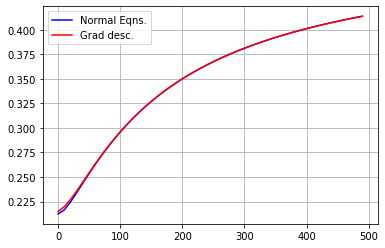

In [205]:
x1, y1, x2, y2 = train_test_split(split=1)
x2, y2 = x1, y1
L_r, N_r, G_r = analyze(x1, y1, x2, y2)
plot_graphs(L_r, N_r, G_r)

Normal Equations Error: 0.3005383442333231 for lamda 0
Gradient Descent Error: 0.2703032862222984 for lambda 0
Normal Equations Error: 0.2861952690083793 for lamda 10
Gradient Descent Error: 0.27886200065072875 for lambda 10
Normal Equations Error: 0.29217435772359873 for lamda 20
Gradient Descent Error: 0.28984914733435313 for lambda 20
Normal Equations Error: 0.3022362529168298 for lamda 30
Gradient Descent Error: 0.3014571305837865 for lambda 30
Normal Equations Error: 0.3130485981955317 for lamda 40
Gradient Descent Error: 0.31283281677844405 for lambda 40
Normal Equations Error: 0.32359183373877287 for lamda 50
Gradient Descent Error: 0.323597923557615 for lambda 50
Normal Equations Error: 0.3335194780759248 for lamda 60
Gradient Descent Error: 0.333610419154163 for lambda 60
Normal Equations Error: 0.34273029416359846 for lamda 70
Gradient Descent Error: 0.34284427895132263 for lambda 70
Normal Equations Error: 0.3512219418236892 for lamda 80
Gradient Descent Error: 0.35132836636

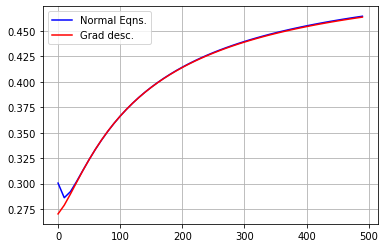

In [206]:
x1, y1, x2, y2 = train_test_split(split=.7)
L_r, N_r, G_r = analyze(x1, y1, x2, y2)
plot_graphs(L_r, N_r, G_r)